<a href="https://colab.research.google.com/github/JoshMcCarron/EECS-3401-Final-Project/blob/main/NBAGames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NBA GAMES: PREDICTING WHICH STATISTICS AFFECT WINNING THE MOST



##This dataset provides information on NBA games, players, rankings, and teams from 2004 to December 2020

###Our goal is to predict which stats play the biggest roll in winning based on the 2020-2021 NBA season statistics.

In [ ]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## The code below needs to be executed once for the dataset to load on your device. On Kaggle->go to profile->go to account->go to "API" section->click "Create New Token." A json file should download. Run the below code, and when it asks to upload the file, upload the json file

In [ ]:
# the following code is used to load the dataset from kaggle into the dataframe. Once executed it is no longer needed.
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d nathanlauga/nba-games

!unzip nba-games.zip

Saving kaggle.json to kaggle.json
 28% 6.00M/21.2M [00:00<00:00, 61.3MB/s]
100% 21.2M/21.2M [00:00<00:00, 116MB/s] 
Archive:  nba-games.zip
  inflating: games.csv               
  inflating: games_details.csv       
  inflating: players.csv             
  inflating: ranking.csv             
  inflating: teams.csv               


## Loading the dataset
#### Although we will only use games.csv we will import the others in case


In [ ]:
#importing the given data


games = pd.read_csv('games.csv')
details = pd.read_csv('games_details.csv')
players = pd.read_csv('players.csv')
ranking = pd.read_csv('ranking.csv')
teams = pd.read_csv('teams.csv')

<ipython-input-5-f61b3fb0a636>:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  details = pd.read_csv('games_details.csv')


## Description of the dataset


In [ ]:
#description of games, used display to line up the colums and display in a table like manner
from IPython.display import display

print("Games Dataframe: ")
display(games.info())
display(games.describe())

Games Dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       2655

None

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.665100e+04,2.665100e+04,2.665100e+04,26651.000000,2.665100e+04,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,2.665100e+04,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26651.000000
mean,2.175487e+07,1.610613e+09,1.610613e+09,2012.113879,1.610613e+09,103.455898,0.460735,0.760377,0.356023,22.823441,43.374284,1.610613e+09,100.639876,0.449732,0.758816,0.349489,21.496271,42.113249,0.587032
std,5.570189e+06,8.638670e+00,8.659299e+00,5.587031,8.638670e+00,13.283370,0.056676,0.100677,0.111164,5.193308,6.625769,8.659299e+00,13.435868,0.055551,0.103429,0.109441,5.160596,6.533039,0.492376
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.070001e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.422000,0.697000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,2.120076e+07,1.610613e+09,1.610613e+09,2012.000000,1.610613e+09,103.000000,0.460000,0.765000,0.357000,23.000000,43.000000,1.610613e+09,100.000000,0.449000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,2.180005e+07,1.610613e+09,1.610613e+09,2017.000000,1.610613e+09,112.000000,0.500000,0.833000,0.429000,26.000000,48.000000,1.610613e+09,110.000000,0.487000,0.833000,0.419000,25.000000,46.000000,1.000000
max,5.210021e+07,1.610613e+09,1.610613e+09,2022.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


## DATA CLEANING

In [ ]:
#convert to datetime in case of sorting and other operations
games['GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'])

### Handle missing values

In [ ]:
# check for missing values
games.isna().sum()

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

#### Since there are not a lot of missing values, we will choose to drop the values in our cleaning process

In [ ]:
# drop missing values
games = games.dropna()

In [ ]:
#check missing values again (should be 0)
games.isna().sum()

GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
dtype: int64

### Features and Target

#### As a lot of variables change depending on the NBA season, we will limit our analysis to the 2020/2021 NBA season

#### Although stats like 'VISITOR_TEAM_ID', and 'HOME_TEAM_ID' play a big role in deciding who wins an NBA game, we will omit it from our features list as we want to focus on stats such as assists, fg%, etc.

In [ ]:
# restirct data to 2020/2021 season
games = games[games['SEASON']== 2020]

#convert to categorical
games['GAME_STATUS_TEXT'] = games['GAME_STATUS_TEXT'].astype('category').cat.codes
#Define target
target = 'HOME_TEAM_WINS'
#define feature set
features = games.columns.drop([target, 'TEAM_ID_home', 'TEAM_ID_away', 'GAME_DATE_EST','SEASON', 'GAME_ID','VISITOR_TEAM_ID','HOME_TEAM_ID'])




<ipython-input-11-c800d13525c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['GAME_STATUS_TEXT'] = games['GAME_STATUS_TEXT'].astype('category').cat.codes


### Graphs for EDA

#### Histogram

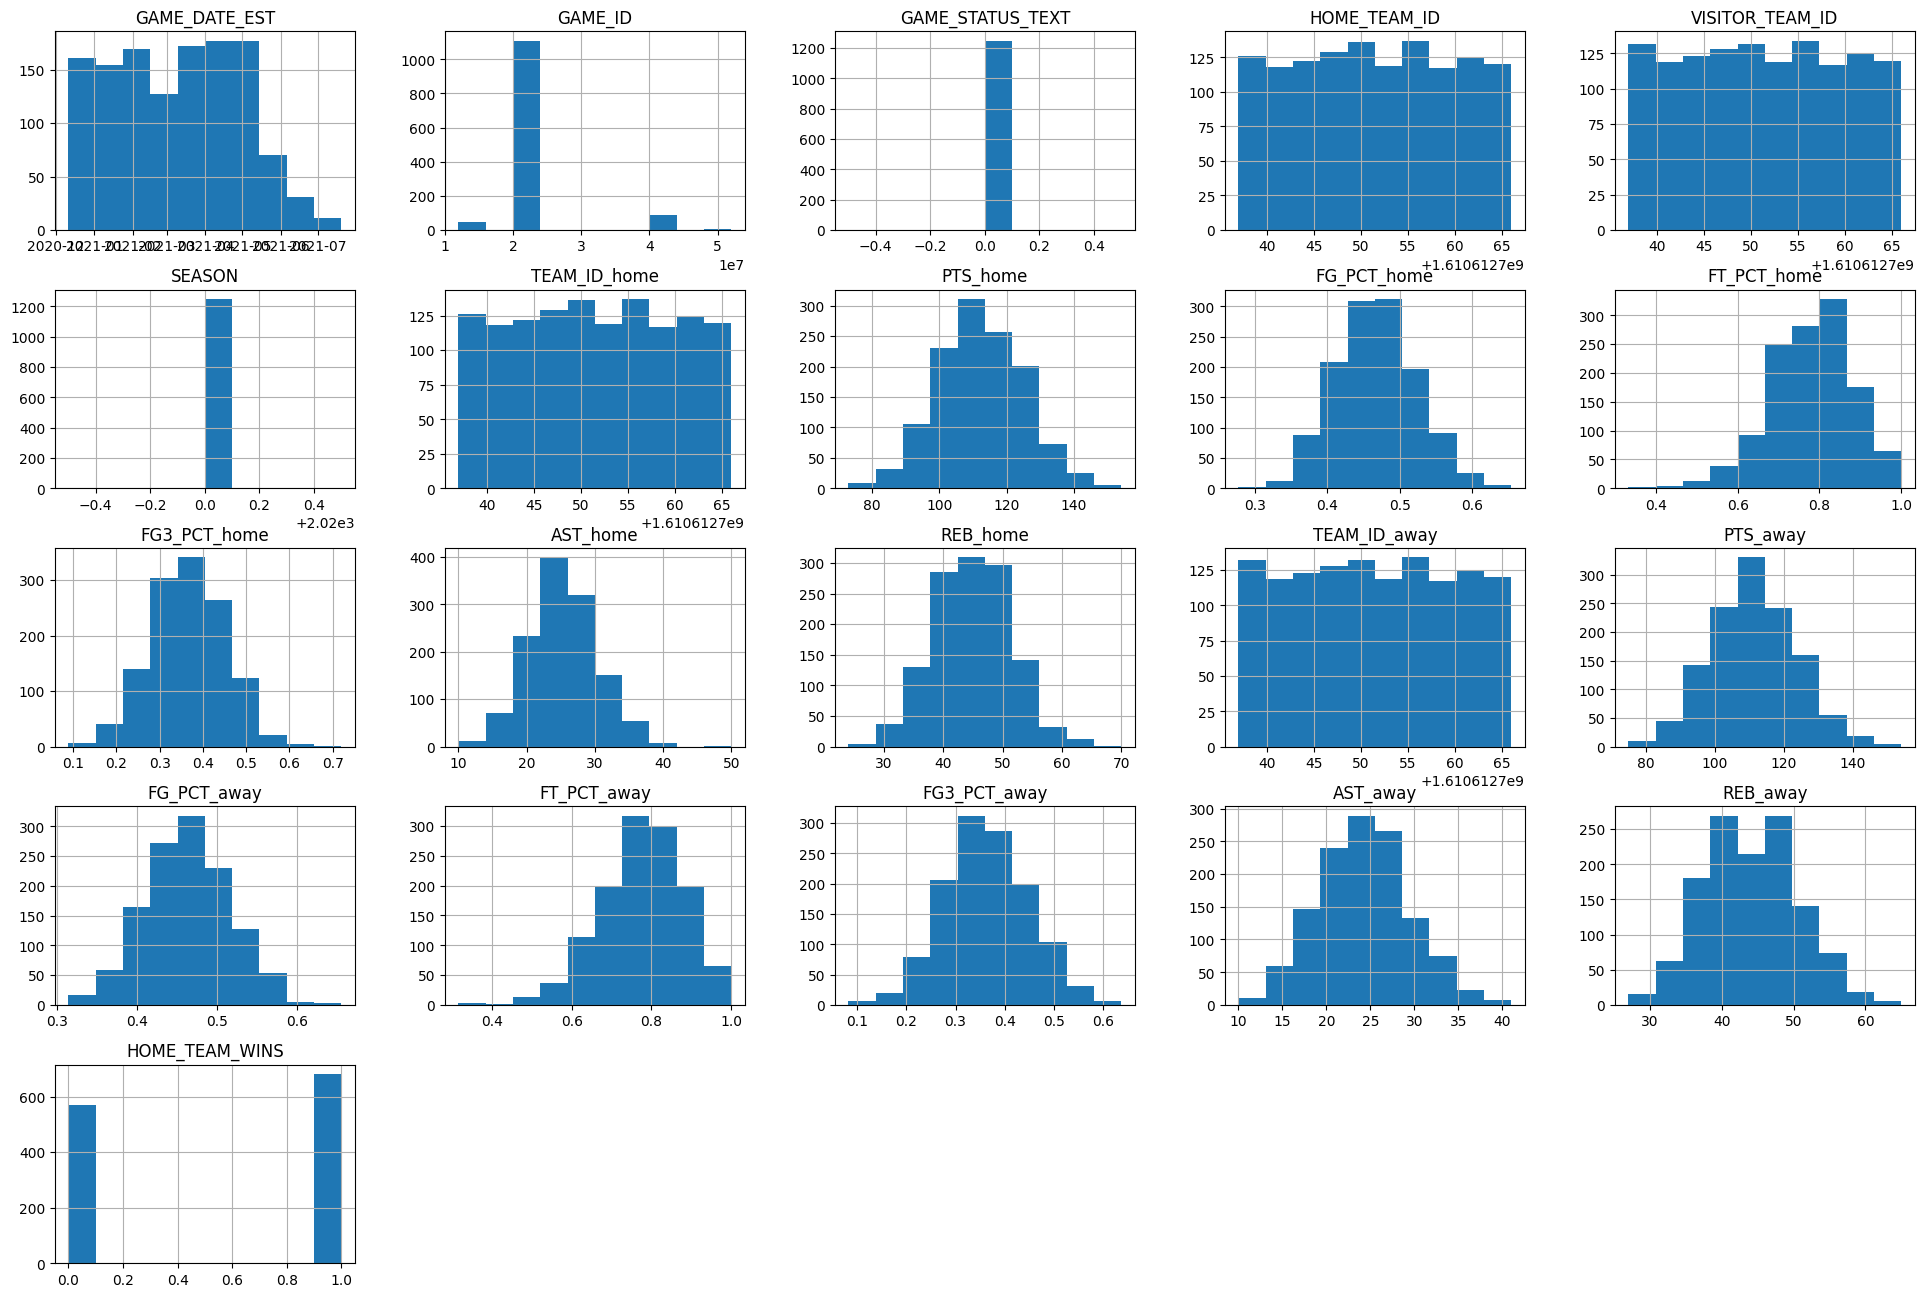

In [ ]:
games.hist(figsize=(24, 16))
plt.show()




#### Correlation Matrix Heatmap

<ipython-input-13-1ffa2d89c467>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = games.corr()


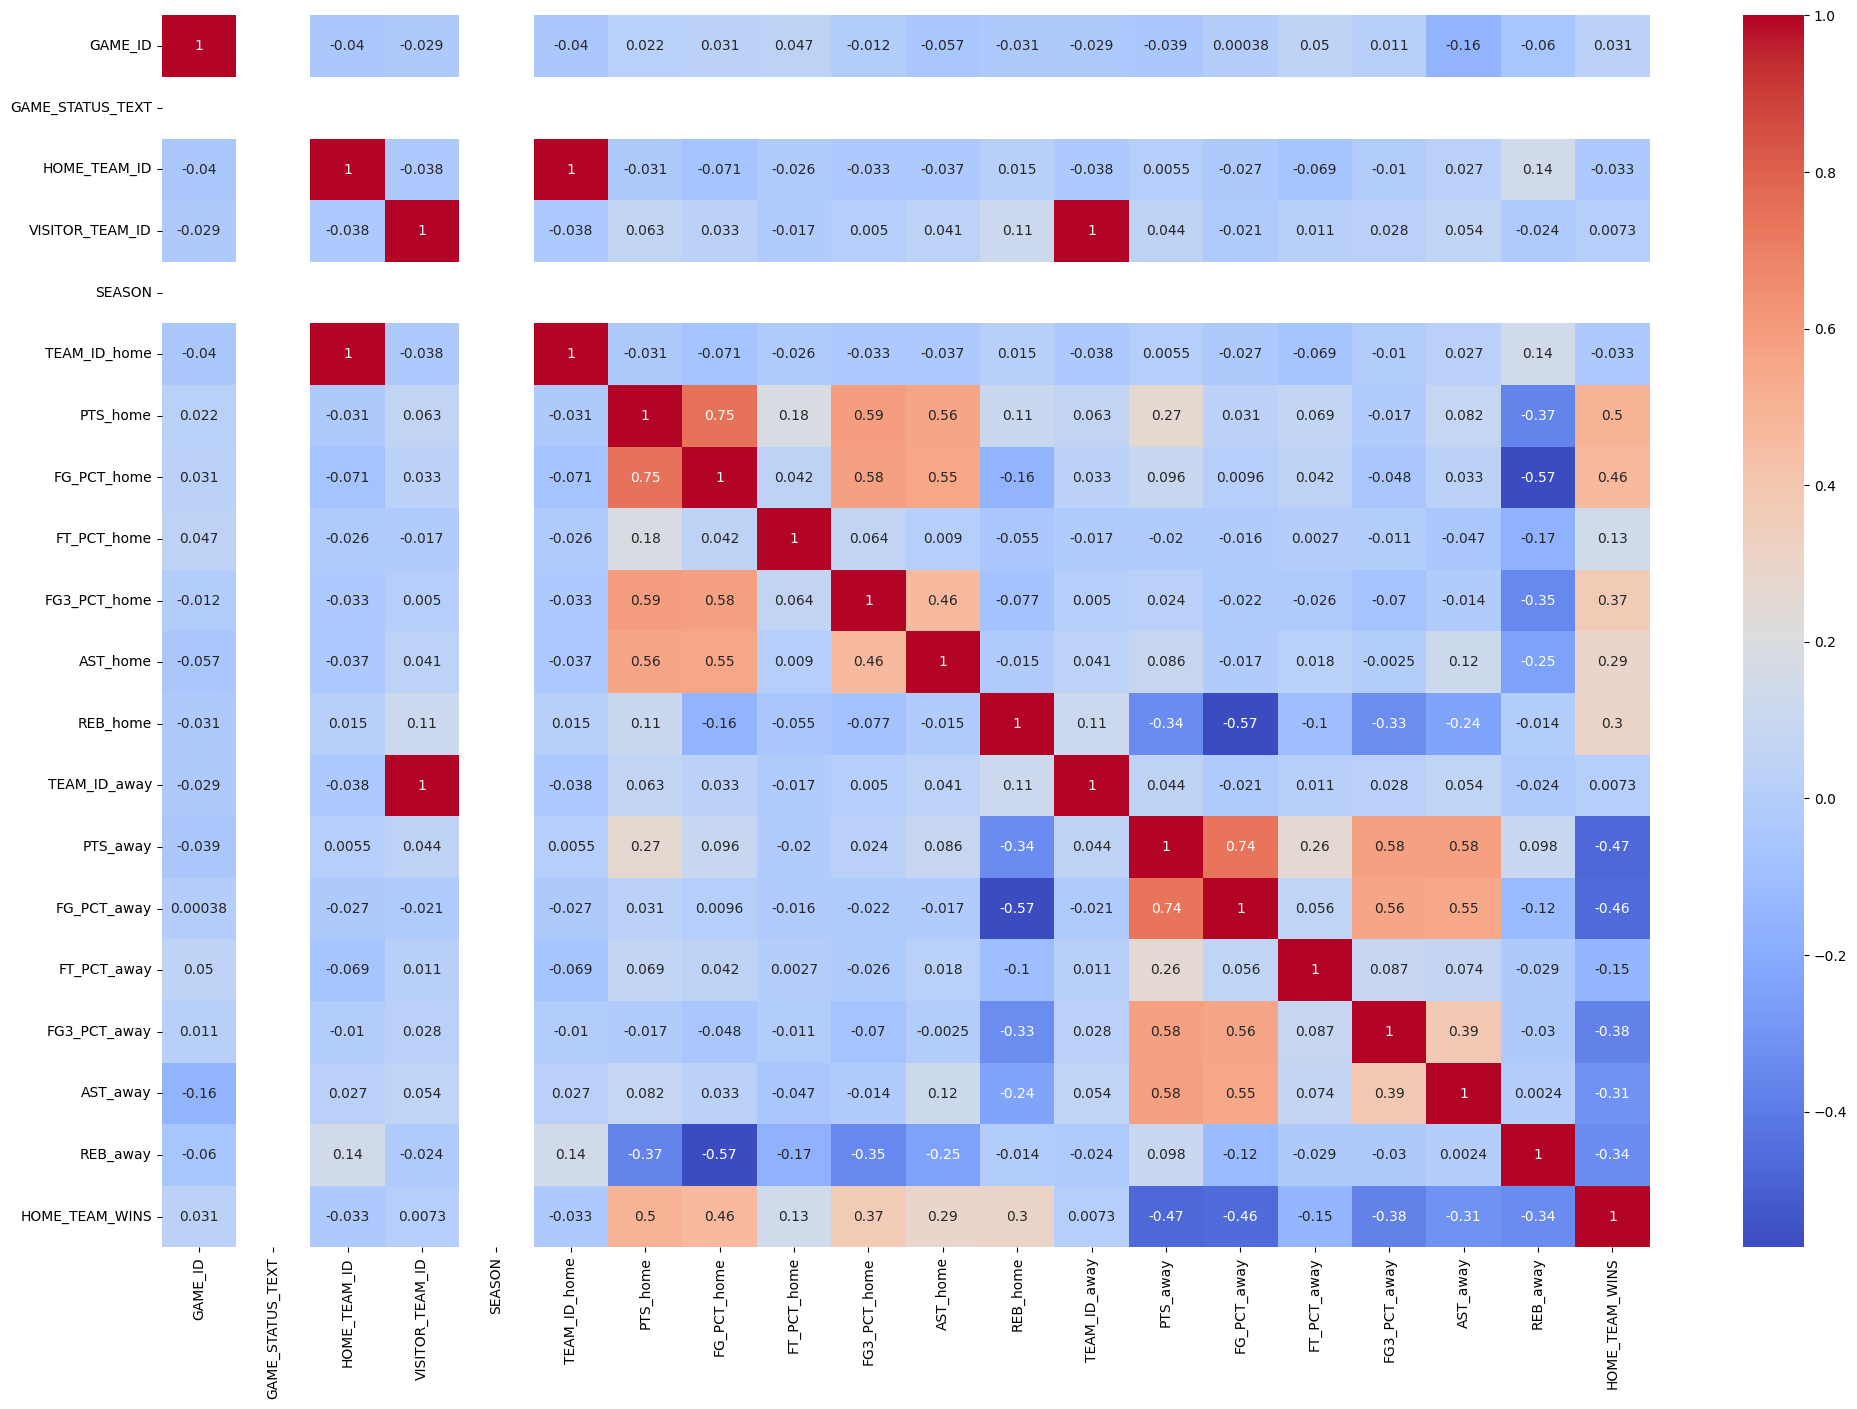

In [ ]:
#represents the correlation between pairs of variables
corr = games.corr()
#plots a 24 x 16 heatmap with numeric annotations in each cells, and a coolearm color representation
plt.figure(figsize=(24, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

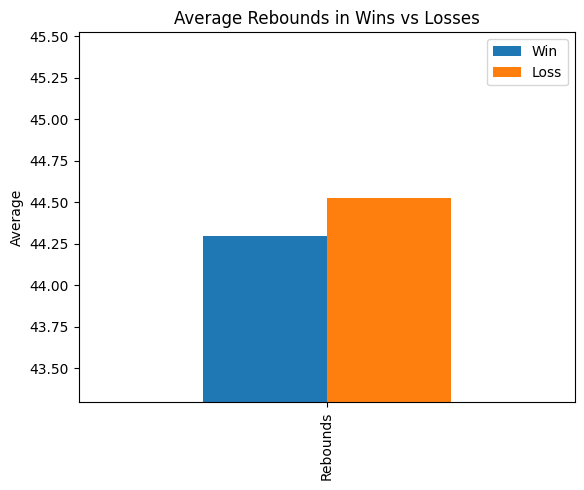

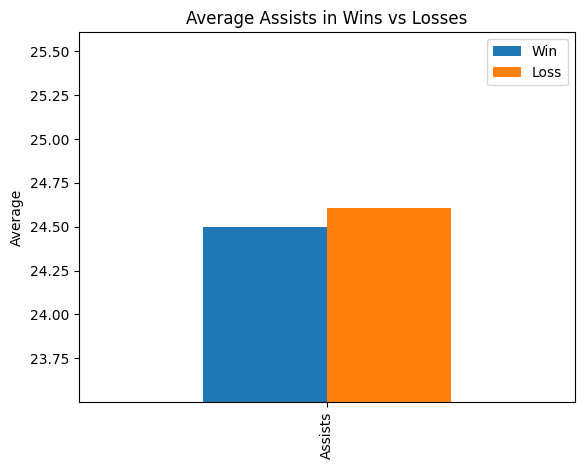

In [ ]:
# Calculate the average rebounds and assists for wins and losses
win_games = games[games['HOME_TEAM_WINS'] == 1]
loss_games = games[games['HOME_TEAM_WINS'] == 0]

# FOR A WIN:gets the average of rebounds at home games and aways games and then averages them
avg_reb_win = win_games[['REB_home', 'REB_away']].mean().mean()
avg_ast_win = win_games[['AST_home', 'AST_away']].mean().mean()
# FOR A LOSS:gets the average of rebounds at home games and aways games and then averages them
avg_reb_loss = loss_games[['REB_home', 'REB_away']].mean().mean()
avg_ast_loss = loss_games[['AST_home', 'AST_away']].mean().mean()

# Create a DataFrame for the averages
rebounds = pd.DataFrame({'Win': avg_reb_win, 'Loss': avg_reb_loss}, index=['Rebounds'])
assists = pd.DataFrame({'Win': avg_ast_win, 'Loss': avg_ast_loss}, index=['Assists'])

# Create the bar graph for rebounds
rebounds.plot(kind='bar')
# the following line of code is added so that the difference in values can be seen clearly as the differences in values are small
plt.ylim([min(avg_reb_win, avg_reb_loss) - 1, max(avg_reb_win, avg_reb_loss) + 1])
plt.ylabel('Average')
plt.title('Average Rebounds in Wins vs Losses')
plt.show()

# Create the bar graph for assists
assists.plot(kind='bar')
# the following line of code is added so that the difference in values can be seen clearly as the differences in values are small
plt.ylim([min(avg_ast_win, avg_ast_loss) - 1, max(avg_ast_win, avg_ast_loss) + 1])
plt.ylabel('Average')
plt.title('Average Assists in Wins vs Losses')
plt.show()

###Training and Testing splits

Split the dataset into a training dataset(80%) and testing dataset.

In [ ]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split
# Assign features to X
X = games[features]
# Assign target to y
y = games[target]
#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print the shapes to verify the split
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(999, 13) (999,) (250, 13) (250,)


In [ ]:
#Apply standardization to training and testing sets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train and test a Linear Regression model and report on MSE

In [ ]:
from sklearn.linear_model import LinearRegression

# Create linear regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_y_predict = lr_model.predict(X_test)

# Evaluate the MSE
from sklearn.metrics import mean_squared_error as mse
lr_mse = mse(y_test, lr_y_predict)
print("mse: ")
print(lr_mse)

mse: 
0.09928907565058594


In [ ]:
# Use negative mse to get the assessment of the model's performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_score = -scores.mean()
print("Cross-Validation Mean Score: ", mean_score)

Cross-Validation Mean Score:  0.0876578432422995


Train a Linear Regression model using Ridge and Lasso with alpha = 1

In [ ]:
from sklearn.linear_model import Ridge, Lasso

RidgeRegression = Ridge(alpha=1)
ridge_model = RidgeRegression.fit(X_train, y_train)
LassoRegression = Lasso(alpha=1)
lasso_model = LassoRegression.fit(X_train, y_train)

# Test on the test dataset and report on mse
Ridge_y_predict = ridge_model.predict(X_test)
Lasso_y_predict = lasso_model.predict(X_test)
ridge_mse = mse(y_test, Ridge_y_predict)
lasso_mse=mse(y_test, Lasso_y_predict)

print("Ridge Regression MSE: ", ridge_mse)
print("Lasso Regression MSE: ", lasso_mse)

Ridge Regression MSE:  0.09926641218991282
Lasso Regression MSE:  0.2477079401724046


Comparing the mse calculated above, the ridge regression has the smallest value, which makes it the best permormance algorithm.

Train a Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse

degree = 2
poly = PolynomialFeatures(degree = degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a new Linear Regression model for polynomial regression
poly_lr_model = LinearRegression()

poly_lr_model.fit(X_train_poly, y_train)
poly_y_train_predict = poly_lr_model.predict(X_train_poly)
poly_y_test_predict = poly_lr_model.predict(X_test_poly)

# Calculate MSE on both sets for polynomial regression
poly_train_mse = mse(y_train, poly_y_train_predict)
print("Polynomial Training MSE: ", poly_train_mse)
poly_test_mse = mse(y_test, poly_y_test_predict)
print("Polynomial Test MSE: ", poly_test_mse)

Polynomial Training MSE:  0.0753830697415067
Polynomial Test MSE:  0.11174235862278012


Train a Support Vector Machines(SVM)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create Linear SVM
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)



Accuracy:  0.996


Comparing the linear and polynomial mean squared errors, the smaller it is, the more close between predicted and actual values. Therefore, looking at the test mse values, linear regression is considered the better one. However, in the case of SVM, it has the accuracy of 0.996, which is very close to one, thus, the SVM method will be the best one of the three algorithms above.

## Analysis of findings

In [ ]:
# Get coefficients from the model
coefficients = svm_model.coef_[0]

# Create a DataFrame for easy visualization
coef_df = pd.DataFrame({'feature': features, 'coefficient': coefficients})

# Sort by the absolute value of coefficient
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)

print(coef_df)

             feature  coefficient  abs_coefficient
7           PTS_away    -4.280537         4.280537
1           PTS_home     4.223625         4.223625
2        FG_PCT_home     0.160999         0.160999
11          AST_away    -0.120854         0.120854
10      FG3_PCT_away     0.081746         0.081746
5           AST_home     0.056703         0.056703
3        FT_PCT_home    -0.051055         0.051055
8        FG_PCT_away    -0.048674         0.048674
12          REB_away    -0.037604         0.037604
4       FG3_PCT_home    -0.021030         0.021030
9        FT_PCT_away    -0.019706         0.019706
6           REB_home    -0.003750         0.003750
0   GAME_STATUS_TEXT     0.000000         0.000000


### Although our analysis shows that points from away and home play the biggest role in winning an NBA game in the 2020/2021 season, that is obvious. The stat that truly stands out is FG_PCT_home as it is the statistic that contributes the most in a win.

### Overall the top three statistics that play the biggest role in winning a game in the 2020.2021 NBA season are
#### 1. FG_PCT_home
#### 2. AST_away
#### 3. FG3_PCT_away


## Graphs for best performing algorithm

ROC curve

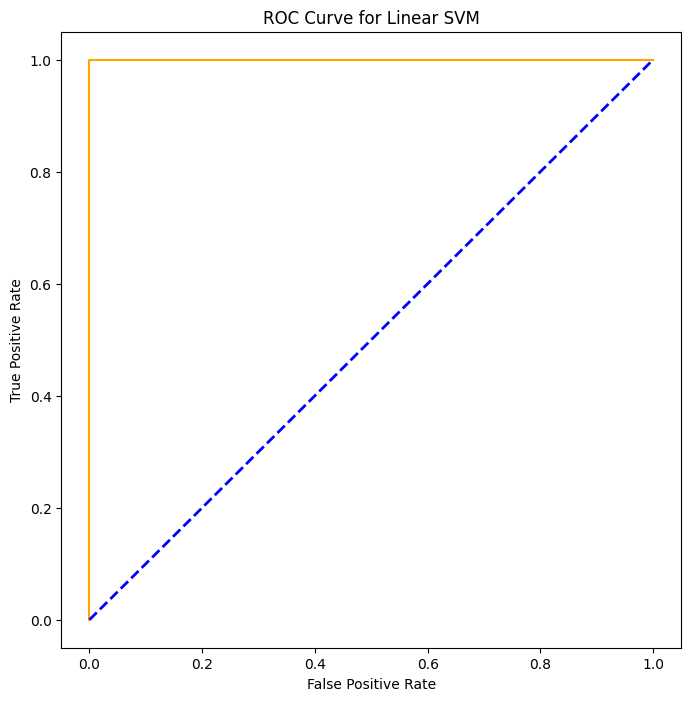

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve, auc

# Calibrate the model to get probability estimates
calibrated_svc = CalibratedClassifierCV(svm_model, method='sigmoid')
calibrated_svc.fit(X_train, y_train)
# Get probability estimates for the positive class
y_prob = calibrated_svc.predict_proba(X_test)[:, 1]
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='orange')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Linear SVM')
plt.show()

### Confusion Matrix

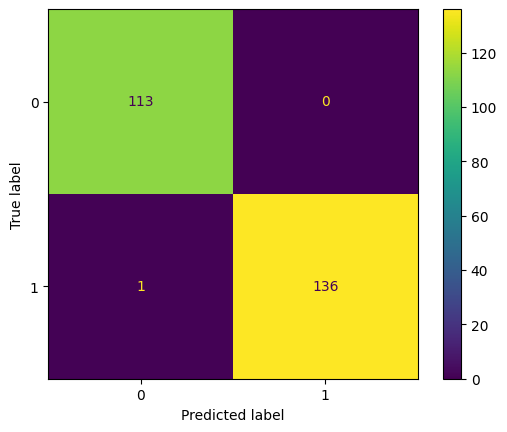

In [ ]:
# following two lines of code are taken from task 9.2 in assignment 2
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Learning Curve

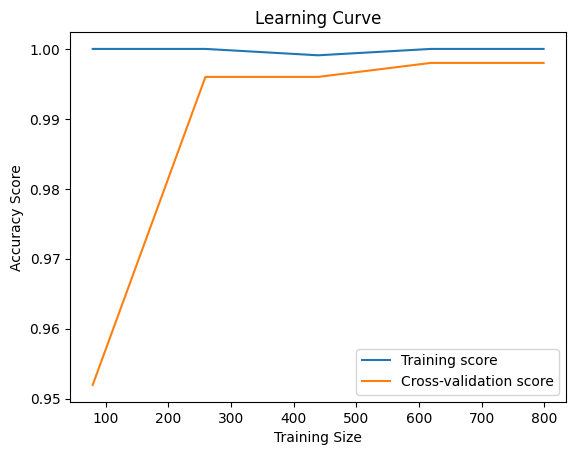

In [ ]:
from sklearn.model_selection import learning_curve

#the following code is inspired from cell 31 of 04_training_linear_models.ipynb from ageron's handson-ml3 link:https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb
train_sizes, train_scores, test_scores = learning_curve(svm_model, X_train, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()